# Calculo control orientado eurocopa masculina 2024

In [1]:
# Instalamos librerias
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importamos librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from statsbombpy import sb
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
competitions = sb.competitions()
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
competitions[competitions['competition_name'] == 'UEFA Euro']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [ ]:
# IDs para La Eurocopa Masculina
COMPETITION_ID = 55
SEASON_ID = 282

# Obtener partidos de la competición y temporada
matches = sb.matches(competition_id=COMPETITION_ID, season_id=SEASON_ID )
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [7]:
# Agrupamos todos los partidos en un solo DataFrame
matches_list = matches['match_id'].tolist()

In [ ]:
# Juntar todos los eventos de todos los partidos de la competición en un mismo dataframe
all_events = [] 
all_frames = [] 
for count, id in enumerate(matches_list):
    # print("Match Count: ", count)
    events = sb.events(match_id=id)
    frames = sb.frames(match_id=id)
    all_events.append(events) 
    all_frames.append(frames) 

events = pd.concat(all_events, ignore_index=True)
frames = pd.concat(all_frames, ignore_index=True)

In [9]:
events

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
frames

,id,visible_area,match_id,teammate,actor,keeper,location
0,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,True,"[22.697541663925428, 41.01277368603656]"
1,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[46.54665402564941, 46.65992069066397]"
2,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[47.44522057974756, 64.52929870627902]"
3,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[48.81954571089864, 35.810976155696935]"
4,25dfc952-7a85-464f-b884-982064d46cc9,"[82.05880352279489, 80.0, 37.469993200629204, ...",3942819,True,False,False,"[49.74595437091587, 27.859841158806844]"
...,...,...,...,...,...,...,...
2682791,38454a4e-9146-4ea9-a030-a218f89577ec,"[0.0, 80.0, 0.0, 28.23202227625909, 22.9743547...",3930158,True,False,False,"[15.948856551775805, 55.95216286228902]"
2682792,38454a4e-9146-4ea9-a030-a218f89577ec,"[0.0, 80.0, 0.0, 28.23202227625909, 22.9743547...",3930158,False,False,False,"[17.452580090224245, 33.005712133560706]"
2682793,38454a4e-9146-4ea9-a030-a218f89577ec,"[0.0, 80.0, 0.0, 28.23202227625909, 22.9743547...",3930158,False,False,False,"[19.947396309933282, 45.41233704070139]"
2682794,38454a4e-9146-4ea9-a030-a218f89577ec,"[0.0, 80.0, 0.0, 28.23202227625909, 22.9743547...",3930158,True,False,False,"[20.328016357383106, 42.49520526434236]"


In [11]:
# Ver las columnas que contengan la palabra pass
events.columns[events.columns.str.contains('pass')]

Index(['pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goal_assist', 'pass_height', 'pass_length',
       'pass_outcome', 'pass_outswinging', 'pass_recipient',
       'pass_recipient_id', 'pass_shot_assist', 'pass_switch',
       'pass_technique', 'pass_through_ball', 'pass_type', 'shot_key_pass_id',
       'pass_inswinging', 'pass_no_touch', 'pass_straight',
       'pass_miscommunication'],
      dtype='object')

In [12]:
col_passes = events[['pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome',
       'pass_outswinging', 'pass_recipient', 'pass_recipient_id',
       'pass_shot_assist', 'pass_straight', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'shot_key_pass_id', 'pass_cut_back',
       'pass_deflected']]
col_passes

,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,...,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,shot_key_pass_id,pass_cut_back,pass_deflected
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
events[events['pass_angle'].notnull()]

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(type(events['timestamp'][0]))

<class 'str'>


In [15]:
print(events['pass_outcome'].isnull().sum())
print(events['pass_deflected'].notnull().sum())
print(events[(events['type']=='Pass') & (events['pass_outcome'].isnull()) & (events['pass_deflected'].notnull())].shape[0])
print(events[(events['type']=='Pass') & (events['pass_outcome'].isnull())].shape[0])
print(events[(events['type']=='Pass') & (events['pass_outcome'].isnull())].shape[0])

179346
38
36
45378
45378


In [16]:
events['type'].value_counts()

type
Pass                 53890
Ball Receipt*        51618
Carry                44139
Pressure             14544
Ball Recovery         4130
Duel                  3059
Block                 1992
Clearance             1852
Goal Keeper           1618
Shot                  1340
Foul Committed        1317
Dribble               1280
Foul Won              1271
Miscontrol            1100
Dispossessed           976
Interception           813
Dribbled Past          712
Substitution           467
50/50                  293
Injury Stoppage        266
Half Start             230
Half End               230
Tactical Shift         171
Referee Ball-Drop      121
Starting XI            102
Player On               72
Player Off              72
Bad Behaviour           58
Shield                  52
Error                   38
Offside                 15
Own Goal Against        10
Own Goal For            10
Name: count, dtype: int64

In [18]:
# Filtrar pases exitosos
successful_passes = events[(events['type'] == 'Pass') & (events['pass_outcome'].isnull()) & (events['play_pattern'] != 'From Corner')].copy()
successful_passes.shape

(43892, 114)

In [20]:
print(successful_passes.shape)
print(successful_passes['id'].nunique())

(43892, 114)
43892


Cada id de evento es unico, da igual el partido

In [21]:
# Función para calcular jugadores cercanos al receptor del balón
def get_nearby_players(event_id, frames, distance_threshold=5):
    """
    Calcula el número y las posiciones de jugadores cercanos al receptor del balón.
    """
    # Obtener frame correspondiente al evento
    player_positions = frames.loc[frames['id'] == event_id]

    if player_positions.empty:
        return pd.Series({
            'num_rivals_nearby': 0,
            'num_teammates_nearby': 0,
            'rivals_positions': [],
            'teammates_positions': []
        })

    # Filtrar por equipo (rivales y compañeros)
    rivals = player_positions[player_positions['teammate'] == False]
    teammates = player_positions[player_positions['teammate'] == True]

    # Obtener posición del receptor del pase
    event = successful_passes.loc[successful_passes['id'] == event_id]
    if event.empty:
        return pd.Series({
            'num_rivals_nearby': 0,
            'num_teammates_nearby': 0,
            'rivals_positions': [],
            'teammates_positions': []
        })
    receiver_pos = event.iloc[0]['pass_end_location']
    if receiver_pos is None:
        return pd.Series({
            'num_rivals_nearby': 0,
            'num_teammates_nearby': 0,
            'rivals_positions': [],
            'teammates_positions': []
        })

    # Calcular distancias al receptor
    def calculate_distance(pos):
        return ((pos[0] - receiver_pos[0])**2 + (pos[1] - receiver_pos[1])**2)**0.5

    rivals['distance'] = rivals['location'].apply(calculate_distance)
    teammates['distance'] = teammates['location'].apply(calculate_distance)

    # Filtrar jugadores cercanos según el umbral
    nearby_rivals = rivals[rivals['distance'] <= distance_threshold]
    nearby_teammates = teammates[teammates['distance'] <= distance_threshold]

    return pd.Series({
        'num_rivals_nearby': len(nearby_rivals),
        'num_teammates_nearby': len(nearby_teammates),
        'rivals_positions': nearby_rivals['location'].tolist(),
        'teammates_positions': nearby_teammates['location'].tolist()
    })

In [22]:
missing_ids = successful_passes[~successful_passes['id'].isin(frames['id'])]
print("Cantidad de pases sin datos en frames:", len(missing_ids))

Cantidad de pases sin datos en frames: 6225


In [23]:
# Aplicar la función a cada pase
context_data = successful_passes['id'].apply(get_nearby_players, frames=frames)

In [24]:
context_data.shape

(43892, 4)

In [25]:
context_data.index = successful_passes.index  # Asegurar mismo índice

In [26]:
# Combinar datos en un solo DataFrame
passes_with_context = pd.concat([successful_passes.reset_index(drop=True), context_data], axis=1)
passes_with_context

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect,num_rivals_nearby,num_teammates_nearby,rivals_positions,teammates_positions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]
185486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]
185487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,"[[100.15058397888887, 20.983269241702057]]",[]
185488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]


Guardamos los DF para no tener que cargar el codigo de nuevo

In [ ]:
# Guardar context_data y passes_with_context en un csv, si se quiere realizar, descomentar
# passes_with_context.to_csv('passes_with_context.csv', index=False)
# context_data.to_csv('context_data.csv', index=False)

In [ ]:
# Cargamos datos
# passes_with_context = pd.read_csv('passes_with_context.csv')
# context_data = pd.read_csv('context_data.csv')

In [29]:
context_data

,num_rivals_nearby,num_teammates_nearby,rivals_positions,teammates_positions
0,0,0,[],[]
1,1,1,"[[84.03694698329629, 51.557318281213135]]","[[85.82467280998831, 52.34132132636846]]"
2,0,1,[],"[[36.902858757234355, 25.651470818111697]]"
3,0,1,[],"[[40.32559973797689, 24.339712870707665]]"
4,0,0,[],[]
...,...,...,...,...
43887,0,0,[],[]
43888,0,0,[],[]
43889,1,0,"[[100.15058397888887, 20.983269241702057]]",[]
43890,0,0,[],[]


In [30]:
passes_with_context

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect,num_rivals_nearby,num_teammates_nearby,rivals_positions,teammates_positions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]
76940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]
76941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,"[[100.15058397888887, 20.983269241702057]]",[]
76942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,[],[]


In [ ]:
# Juntar las nuevas columnas en el dataset general
context_columns = ['num_rivals_nearby', 'num_teammates_nearby', 'rivals_positions', 'teammates_positions'] 

events_with_context = pd.concat([events, passes_with_context[context_columns]], axis=1)


In [ ]:
# Checkpoint para no tener que cargar todo el código
# Se guardan los datos en un csv
# events_with_context.to_csv('events_with_rivals_context.csv', index=False)

In [34]:
passes_with_context['pass_end_location']

0        [25.7, 34.5]
1        [85.1, 51.3]
2        [37.1, 24.1]
3        [41.0, 25.0]
4        [27.0, 36.5]
             ...     
76939             NaN
76940             NaN
76941             NaN
76942             NaN
76943             NaN
Name: pass_end_location, Length: 76944, dtype: object

In [37]:
events_with_context['pass_end_location'].notna().sum()

53890

In [38]:
from math import sqrt

def calculate_distance_to_goal(event, attacking_goal=(120, 40), defending_goal=(0, 40)):
    """
    Calcula la distancia del receptor del balón a ambas porterías (atacante y defensora).
    """
    # Usar pass_end_location para eventos de pase, o location para otros eventos
    location = event.get('pass_end_location') if 'pass_end_location' in event and event['pass_end_location'] else event.get('location')

    # Verificar si location es válida
    if not isinstance(location, (list, tuple)) or len(location) != 2:
        return pd.Series({'distance_to_attacking_goal': None, 'distance_to_defending_goal': None})

    event_x, event_y = location

    # Distancia a la portería atacante
    dist_attacking = sqrt((attacking_goal[0] - event_x)**2 + (attacking_goal[1] - event_y)**2)

    # Distancia a la portería defensora
    dist_defending = sqrt((defending_goal[0] - event_x)**2 + (defending_goal[1] - event_y)**2)

    return pd.Series({'distance_to_attacking_goal': dist_attacking, 'distance_to_defending_goal': dist_defending})



In [39]:
# Calcular distancia a las porterías usando la posición de recepción del balón
goal_distances = events_with_context.apply(calculate_distance_to_goal, axis=1)

# Añadir columnas de distancia al DataFrame
events_with_context = pd.concat([events_with_context, goal_distances], axis=1)

# Verificar estructura
events_with_context[['type', 'pass_end_location', 'location',
                           'distance_to_attacking_goal', 'distance_to_defending_goal']]

,type,pass_end_location,location,distance_to_attacking_goal,distance_to_defending_goal
0,Starting XI,NaN,NaN,NaN,NaN
1,Starting XI,NaN,NaN,NaN,NaN
2,Half Start,NaN,NaN,NaN,NaN
3,Half Start,NaN,NaN,NaN,NaN
4,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...
187853,Substitution,NaN,NaN,NaN,NaN
187854,Substitution,NaN,NaN,NaN,NaN
187855,Error,NaN,"[15.1, 46.4]",NaN,NaN
187856,Own Goal For,NaN,"[109.8, 47.3]",NaN,NaN


In [40]:
events_with_context['num_rivals_nearby'].value_counts()

num_rivals_nearby
0.0    40242
1.0     3129
2.0      442
3.0       63
4.0       12
5.0        4
Name: count, dtype: int64

In [ ]:
# Filtrar eventos relevantes
relevant_events = events_with_context[events_with_context['type'].isin(['Pass'])].copy()

,type,location,distance_to_attacking_goal,distance_to_defending_goal,num_rivals_nearby
6,Pass,"[60.0, 40.0]",94.460256,26.281933,0.0
7,Pass,"[30.4, 24.1]",33.588689,90.200887,NaN
8,Pass,"[30.9, 26.7]",60.684430,59.486133,NaN
9,Pass,"[60.7, 43.3]",36.683784,85.846957,1.0
10,Pass,"[50.1, 16.3]",84.411018,40.363597,0.0


In [42]:
# Añadir zona del campo
def assign_pitch_third(event):
    x = event['location'][0] if event['location'] is not None else None
    if x is None:
        return 'unknown'
    elif x < 40:
        return 'defensive_third'
    elif x < 80:
        return 'middle_third'
    else:
        return 'attacking_third'


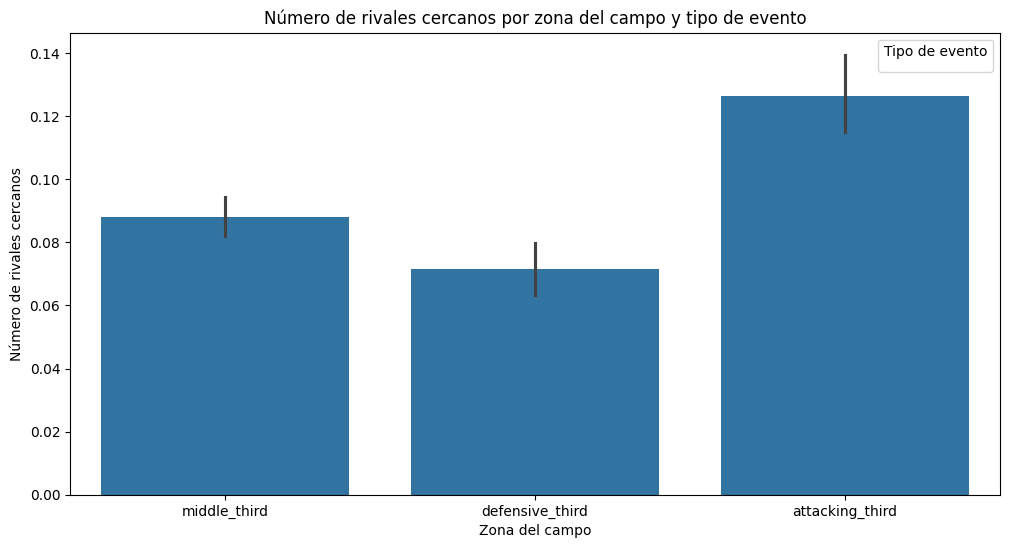

In [ ]:
relevant_events['pitch_zone'] = relevant_events.apply(assign_pitch_third, axis=1)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=relevant_events, x='pitch_zone', y='num_rivals_nearby')
plt.title('Número de rivales cercanos por zona del campo y tipo de evento')
plt.ylabel('Número de rivales cercanos')
plt.xlabel('Zona del campo')
plt.legend(title='Tipo de evento')
plt.show()

In [45]:
relevant_events['num_rivals_nearby'].value_counts()

num_rivals_nearby
0.0    18729
1.0     1413
2.0      181
3.0       20
4.0        8
5.0        2
Name: count, dtype: int64

In [46]:
events_with_context['timestamp'].dtype

dtype('O')

In [47]:
# Convertir los timestamps a objetos datetime
events_with_context['timestamp'] = pd.to_datetime(events_with_context['timestamp'], format='%H:%M:%S.%f')
events['timestamp'] = pd.to_datetime(events['timestamp'], format='%H:%M:%S.%f')


events_with_context[['x','y']] = events_with_context.location.apply(pd.Series)
events[['x','y']] = events.location.apply(pd.Series)
events_with_context[['pass_end_location_x','pass_end_location_y']] = events_with_context.pass_end_location.apply(pd.Series)
events[['pass_end_location_x','pass_end_location_y']] = events.pass_end_location.apply(pd.Series)

In [48]:
def adjust_timestamp(row):
    """Convierte el tiempo a un formato continuo teniendo en cuenta los periodos del partido."""
    minute = row['timestamp'].minute
    second = row['timestamp'].second
    added_time = (row['timestamp'] - pd.to_datetime(f'{minute}:{second}', format='%M:%S')).seconds / 60  # Minutos añadidos

    if row['period'] == 2:  # Segunda mitad
        return 45 + minute + added_time  # Sumar 45 minutos a la segunda mitad
    elif row['period'] == 3:  # Tercera mitad
        return 90 + minute + added_time  # Sumar 90 minutos a la tercera mitad
    elif row['period'] == 4:
        return 105 + minute + added_time  # Sumar 105 minutos a la cuarta mitad

    return minute + added_time  # Primera mitad queda igual



In [49]:
# Aplicar la transformación al DataFrame
events['continuous_timestamp'] = events.apply(adjust_timestamp, axis=1)
events_with_context['continuous_timestamp'] = events_with_context.apply(adjust_timestamp, axis=1)

In [ ]:
# Guardamos de nuevo events_with_context en un csv
# events_with_context.to_csv('events_with_context.csv', index=False)

In [ ]:
# events_with_context = pd.read_csv('events_with_context.csv')

# Cálculo del control orientado

Teniendo en cuenta las diferentes respuestas de la LLM se propone una única formula que agrupa las propuestas.
En esta formula no es incluye la variable Orientación Corporal (OC) debido a la imposibilidad de calcularlo con los datos de StatsBomb. Se puede proponer como posible mejora.
Ahora, la fórmula quedaría así:


CO = w1 * pass_dir_q + w2 * context_awareness + w3 * position_int + w4 * subsequent_action

w1 = 0.15  -->   pass_dir_q = el angulo del pase y la longitud del mismo

w2 = 0.30  -->   context_awareness = cantidad de jugadores rivales en el momento del
                control, cuanto mas mayor valor

w3 = 0.20 -->    position_int = posición del jugador en el momento del control,
                cuanto mas cerca de la portería rival mayor valor.

w4 = 0.35  -->   subsequent_action = calidad de la siguiente acción, el valor ira en funcion de la accion, disminuyendo
                su valor desde gol, asistencia, tiro, pase hacia delante, pase horizontal, pase hacia atras, o otro.

Preparamos las funciones que calculan cada variable que define el control orientado

In [54]:
def pass_distance_angle(row, events):
    """Calcula la distancia y el ángulo del pase."""
    if pd.isna(row['pass_length']) or pd.isna(row['pass_angle']):
        return 0  # Si falta algún dato, devolver 0

    alpha = 0.6
    beta = 0.4
    max_length = events['pass_length'].max()
    if max_length == 0 or pd.isna(max_length):
        return 0  # Evitar división por 0

    pass_dist_ang = alpha * row['pass_length'] / max_length + beta * (1 - (row['pass_angle'] / math.pi))
    return pass_dist_ang

In [55]:
def context_awareness(row, events, max_rivals):
    """Evalúa la dificultad del contexto según los rivales cercanos."""
    if pd.isna(row['num_rivals_nearby']):
        return 0  # Si el valor es nulo, devolver 0

    return row['num_rivals_nearby'] / max_rivals if max_rivals > 0 else 0

In [56]:
def player_goal_distance(row, events):
    """Penaliza la distancia a la portería (más cerca, mejor)."""
    if pd.isna(row['distance_to_attacking_goal']):
        return 0  # Si el dato es nulo, devolver 0

    return max(0, 1 - row['distance_to_attacking_goal'] / 120)

In [57]:
def subsequent_action_quality(row, events, time_threshold):
    """Evalúa la calidad de la acción posterior al control orientado."""
    # Verificar que los valores clave existan
    if pd.isna(row['continuous_timestamp']) or pd.isna(row['match_id']) or pd.isna(row['pass_end_location']):
        return 0

    # Extraer valores
    timestamp = row['timestamp']
    period = row['period']
    match_id = row['match_id']
    pass_end_location = row['pass_end_location']
    team=row['team']

    # Asegurar que pass_end_location es una tupla válida
    if not isinstance(pass_end_location, (tuple, list)) or len(pass_end_location) < 2:
        return 0

    pass_end_location_x, pass_end_location_y = pass_end_location

    positive_action_types = ['Shot', 'Pass', 'Goal']

    # Filtrar eventos del mismo partido y en el tiempo correcto
    subsequent_events = events[
        (events['match_id'] == match_id) &
        (events['team'] == team) &
        (events['period']==period) &
        (events['timestamp'] > timestamp) &
        (events['timestamp'] <= timestamp + time_threshold) &
        (events['type'].isin(positive_action_types))
    ].copy()

    # Calcular distancia a la ubicación del pase
    subsequent_events['distance'] = ((subsequent_events['x'] - pass_end_location_x)**2 +
                                     (subsequent_events['y'] - pass_end_location_y)**2) ** 0.5

    # Filtrar eventos cercanos (menos de 3m de distancia)
    subsequent_events = subsequent_events[subsequent_events['distance'] < 3]

    # Si no hay eventos relevantes, devolver 0
    if subsequent_events.empty:
        return 0

    # Ordenar por timestamp y obtener el primer evento
    first_event = subsequent_events.sort_values('continuous_timestamp').iloc[0]
    action_type = first_event['type']

    # Evaluar calidad según el tipo de evento
    if row['pass_goal_assist']==True:
        return 1.0
    elif row['pass_shot_assist']==True:
        return 0.9
    elif row['pass_cross']==True:
        return 0.7
    elif action_type == 'Pass':
        return 0.6 if first_event['x'] >= pass_end_location_x else 0.4
    else:
        return 0

In [58]:
def calculate_oriented_control_quality(row, events, time_threshold, weight_pass_distance_angle, weight_goal_dist, weight_rivals, weight_action):
    """
    Calcula la calidad del control orientado ajustada, teniendo en cuenta el pase,
    la cantidad de jugadores cercanos y la posterior acción positiva.
    """
    max_rivals = 4  # Máximo número de rivales cercanos teniendo en cuenta que 4 es el numero maximo, con solo un control con este valor

    # Filtrar eventos del mismo partido
    events_match = events[events['match_id'] == row['match_id']]

    # Calcular cada componente asegurando que no devuelvan NaN
    pass_dist_ang_score = pass_distance_angle(row, events_match)
    goal_dist_score = player_goal_distance(row, events_match)
    context_awareness_score = context_awareness(row, events_match, max_rivals)
    subsequent_action_score = subsequent_action_quality(row, events_match, time_threshold)

    # Métrica ponderada
    quality = (weight_pass_distance_angle * pass_dist_ang_score +
               weight_goal_dist * goal_dist_score +
               weight_rivals * context_awareness_score +
               weight_action * subsequent_action_score)

    return quality if not pd.isna(quality) else 0  # Asegurar que no devuelva NaN


In [59]:
successful_passes = events_with_context[
    (events_with_context['type'] == 'Pass') &
    (events_with_context['pass_outcome'].isnull()) &
    (events_with_context['play_pattern'] != 'From Corner')
].copy()

In [60]:
# Aplicar la función para calcular la calidad del control orientado
time_threshold = 3  # Umbral de 3 segundos

# Definir los pesos
weight_pass_distance_angle = 0.15
weight_goal_dist = 0.2
weight_rivals = 0.3
weight_action = 0.35

# Aplicar la función a cada fila y asegurar que `control_quality` no tenga NaN
successful_passes['control_quality'] = successful_passes.apply(
    lambda row: calculate_oriented_control_quality(
        row, events_with_context, time_threshold,
        weight_pass_distance_angle, weight_goal_dist,
        weight_rivals, weight_action
    ),
    axis=1
)

In [ ]:
# Guardar solo los pases con control orientado
# successful_passes.to_csv('successful_passes_with_control_quality.csv', index=False)

In [62]:
events_with_context_oriented_control = events_with_context.merge(
    successful_passes[['id', 'control_quality']],
    on='id',
    how='left'  # Mantenemos todos los eventos y añadimos control_quality solo a los pases
)

In [ ]:
# Guardamos de nuevo events_with_context en un csv
# events_with_context_oriented_control.to_csv('events_control_orientado_eur_masc_2024.csv', index=False)

In [ ]:
# successful_passes = pd.read_csv('successful_passes_with_control_quality.csv')
# events_with_context_oriented_control = pd.read_csv('events_control_orientado_eur_masc_2024.csv')

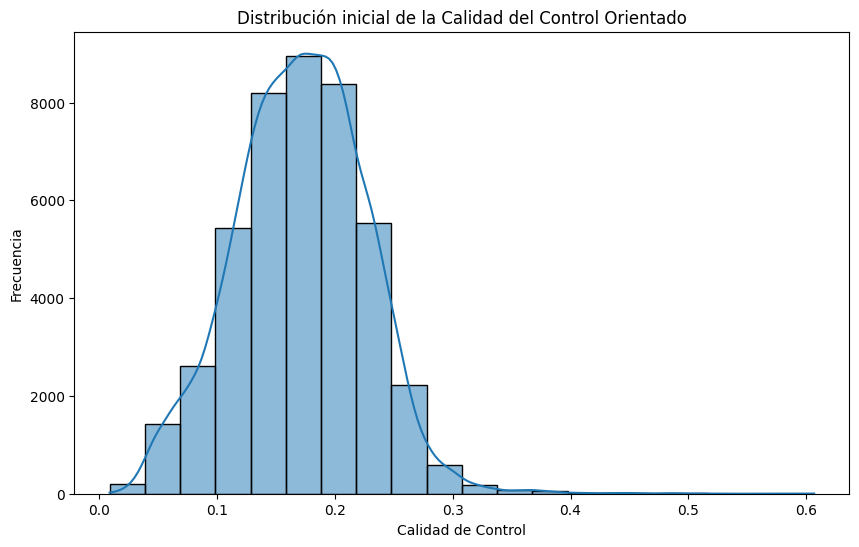

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(successful_passes['control_quality'], bins=20, kde=True)
plt.title("Distribución inicial de la Calidad del Control Orientado")
plt.xlabel("Calidad de Control")
plt.ylabel("Frecuencia")
plt.show()

In [66]:
# Promedio de calidad del control por jugador
player_control_quality = successful_passes.groupby('player_id')['control_quality'].mean().reset_index()
player_control_quality = player_control_quality.rename(columns={'control_quality': 'avg_control_quality'})

# Agregar al DataFrame original
#successful_passes = successful_passes.merge(player_control_quality, on='player_id', how='left')

# Análisis por zonas del campo
successful_passes['field_zone'] = pd.cut(successful_passes['distance_to_attacking_goal'],
                                           bins=[0, 40, 80, 120],
                                           labels=['Offensive', 'Middle', 'Defensive'])
zone_analysis = successful_passes.groupby('field_zone')['control_quality'].mean()
print(zone_analysis)

field_zone
Offensive    0.234844
Middle       0.180707
Defensive    0.121333
Name: control_quality, dtype: float64


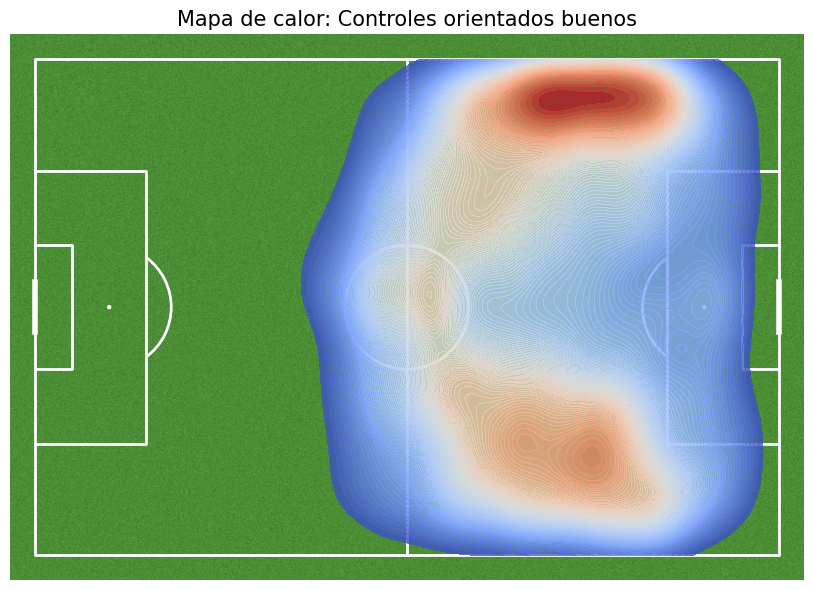

In [ ]:
# Filtramos controles orientados positivos
positive_controls = successful_passes[successful_passes['control_quality'] > 0.2]

# Crear el campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6))

# Extraer las posiciones de los controles orientados
x=positive_controls['pass_end_location_x']
y=positive_controls['pass_end_location_y']

# Crear el mapa de calor
pitch.kdeplot(
    x, y, ax=ax, shade=True, cmap='coolwarm', levels=100, alpha=0.8
)
ax.set_title('Mapa de calor: Controles orientados buenos', fontsize=15)
plt.show()


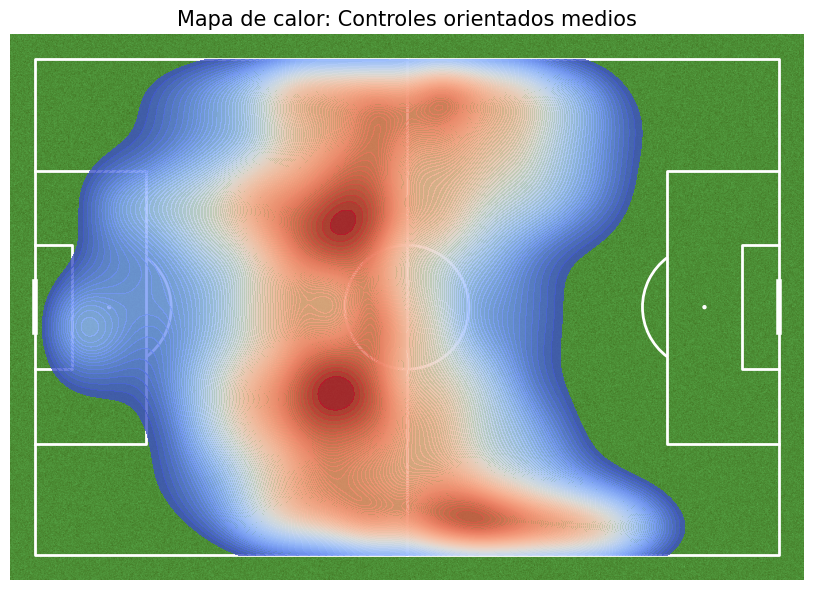

In [ ]:
# Filtramos controles orientados no tan positivos
positive_controls = successful_passes[(successful_passes['control_quality'] <0.2) & (successful_passes['control_quality'] > 0.1)]

# Crear el campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6))

# Extraer las posiciones de los controles orientados
x=positive_controls['pass_end_location_x']
y=positive_controls['pass_end_location_y']

# Crear el mapa de calor
pitch.kdeplot(
    x, y, ax=ax, shade=True, cmap='coolwarm', levels=100, alpha=0.8
)
ax.set_title('Mapa de calor: Controles orientados medios', fontsize=15)
plt.show()

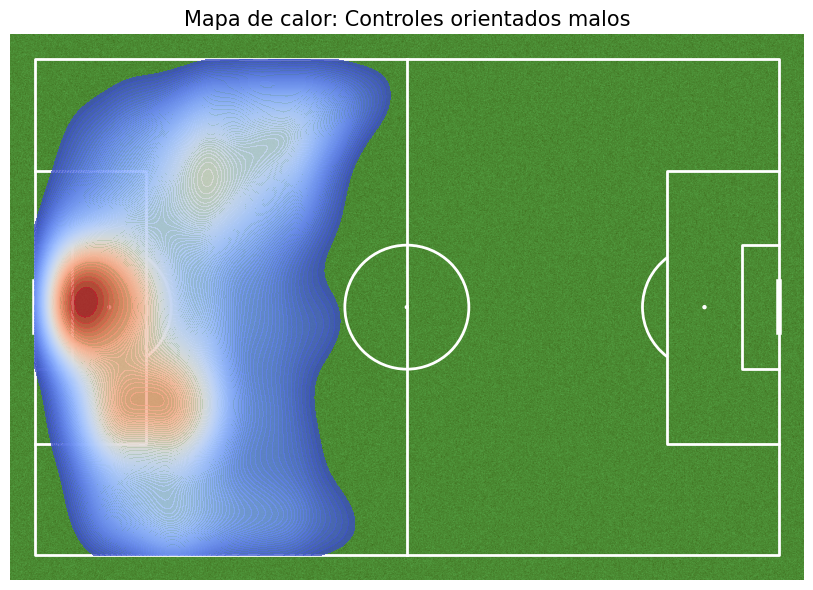

In [ ]:
# Filtramos controles orientados negativos
positive_controls = successful_passes[(successful_passes['control_quality'] <0.1) & (successful_passes['control_quality'] > 0.0)]

# Crear el campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6))

# Extraer las posiciones de los controles orientados
x=positive_controls['pass_end_location_x']
y=positive_controls['pass_end_location_y']

# Crear el mapa de calor
pitch.kdeplot(
    x, y, ax=ax, shade=True, cmap='coolwarm', levels=100, alpha=0.8
)
ax.set_title('Mapa de calor: Controles orientados malos', fontsize=15)
plt.show()

In [70]:
successful_passes['control_quality'].describe()

count    43892.000000
mean         0.171234
std          0.055472
min          0.008907
25%          0.133806
50%          0.172084
75%          0.209074
max          0.606710
Name: control_quality, dtype: float64

In [71]:
successful_passes[successful_passes['control_quality']==0]

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,teammates_positions,distance_to_attacking_goal,distance_to_defending_goal,x,y,pass_end_location_x,pass_end_location_y,continuous_timestamp,control_quality,field_zone


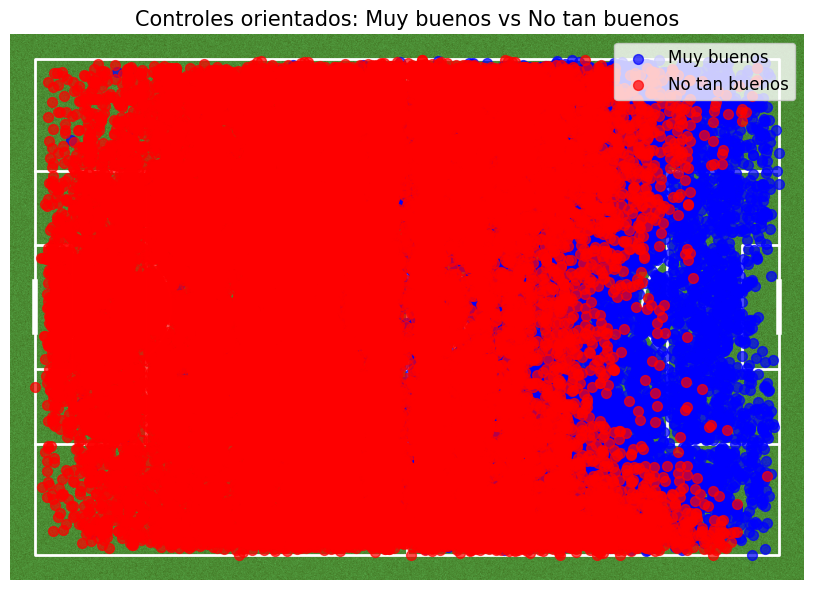

In [72]:
fig, ax = pitch.draw(figsize=(10, 6))

# Filtrar controles Muy buenos y No tan buenos
top_controls = successful_passes[successful_passes['control_quality'] >= 0.2]
normal_controls = successful_passes[successful_passes['control_quality'] < 0.2]

# Dibujar los puntos en el campo
pitch.scatter(top_controls['pass_end_location_x'], top_controls['pass_end_location_y'],
              ax=ax, color='blue', s=50, label='Muy buenos', alpha=0.7)
pitch.scatter(normal_controls['pass_end_location_x'], normal_controls['pass_end_location_y'],
              ax=ax, color='red', s=50, label='No tan buenos', alpha=0.7)

ax.set_title('Controles orientados: Muy buenos vs No tan buenos', fontsize=15)
ax.legend(loc='upper right', fontsize=12)
plt.show()

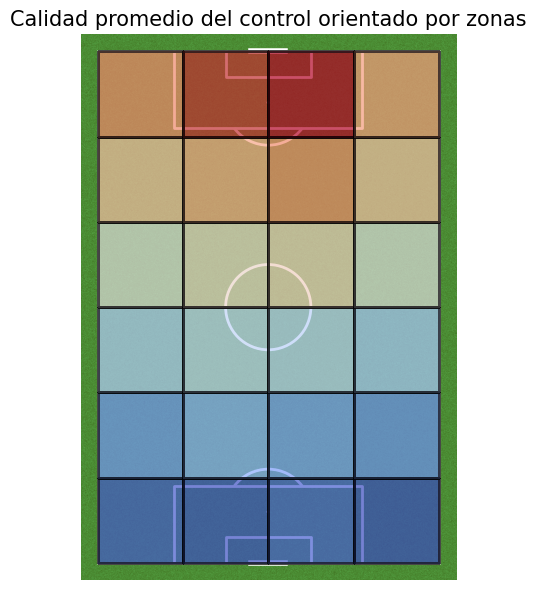

In [73]:
from mplsoccer import VerticalPitch

# Crear el campo
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6))

# Calcular la calidad promedio por zonas
bin_statistic = pitch.bin_statistic(successful_passes['pass_end_location_x'], successful_passes['pass_end_location_y'],
                                    values=successful_passes['control_quality'],
                                    statistic='mean', bins=(6, 4))

# Dibujar un heatmap por zonas
pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='black', alpha=0.7)
ax.set_title('Calidad promedio del control orientado por zonas', fontsize=15)
plt.show()


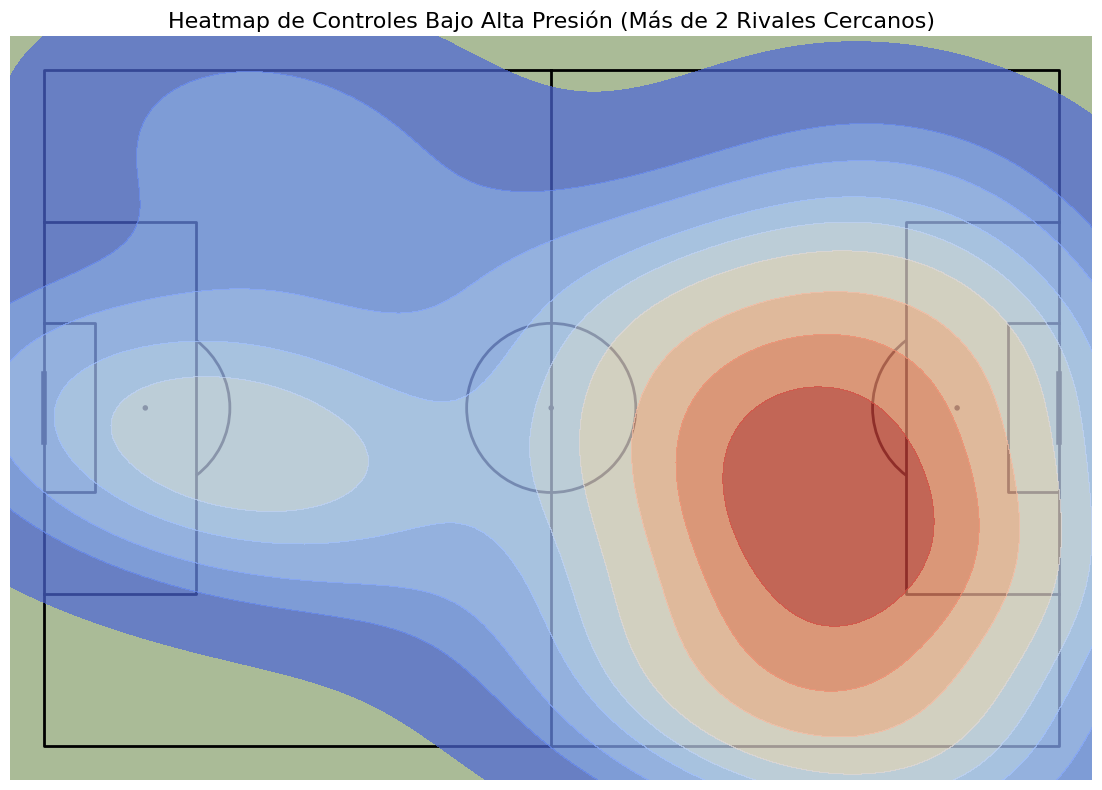

In [ ]:
# Filtrar datos con presión alta (más de 2 rivales cercanos)
high_pressure_controls = successful_passes[successful_passes['num_rivals_nearby'] > 2]

# Heatmap de controles bajo presión alta
pitch = Pitch(pitch_type='statsbomb', line_color='black', pitch_color='#aabb97')
fig, ax = pitch.draw(figsize=(12, 8))
sns.kdeplot(
    x=high_pressure_controls['x'],
    y=high_pressure_controls['y'],
    ax=ax,
    fill=True,
    cmap='coolwarm',
    alpha=0.7
)
ax.set_title("Heatmap de Controles Bajo Alta Presión (Más de 2 Rivales Cercanos)", fontsize=16)
plt.show()

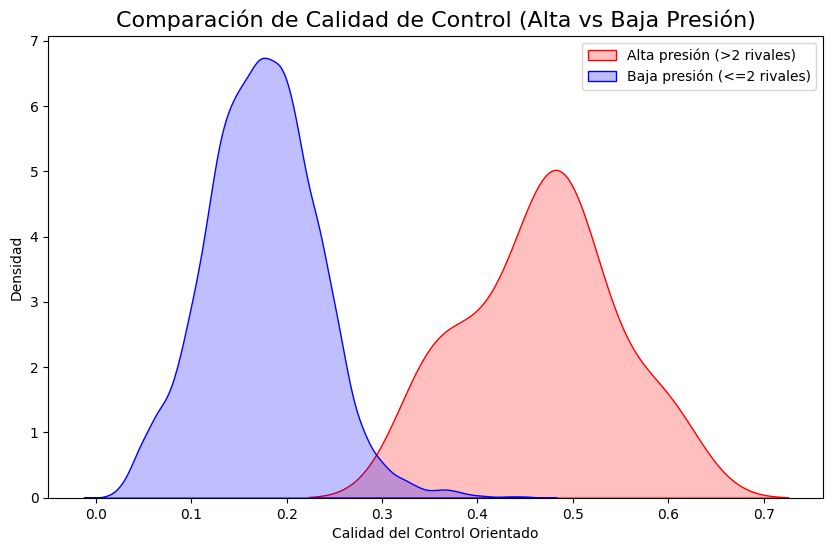

In [ ]:
# Comparación de calidad con y sin presión
low_pressure_controls = successful_passes[successful_passes['num_rivals_nearby'] <= 2]
plt.figure(figsize=(10, 6))
sns.kdeplot(
    high_pressure_controls['control_quality'], label='Alta presión (>2 rivales)', color='red', fill=True
)
sns.kdeplot(
    low_pressure_controls['control_quality'], label='Baja presión (<=2 rivales)', color='blue', fill=True
)
plt.xlabel('Calidad del Control Orientado')
plt.ylabel('Densidad')
plt.title('Comparación de Calidad de Control (Alta vs Baja Presión)', fontsize=16)
plt.legend()
plt.show()

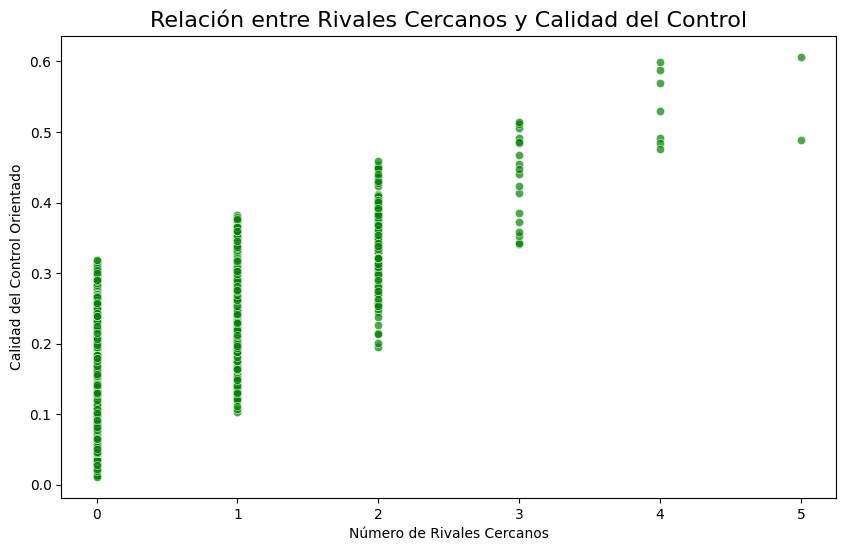

In [ ]:
# Relación entre rivales cercanos y calidad
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=successful_passes['num_rivals_nearby'],
    y=successful_passes['control_quality'],
    alpha=0.7,
    color='green'
)
plt.xlabel('Número de Rivales Cercanos')
plt.ylabel('Calidad del Control Orientado')
plt.title('Relación entre Rivales Cercanos y Calidad del Control', fontsize=16)
plt.show()

In [77]:
print(successful_passes.shape)
print(successful_passes['control_quality'])

(43892, 127)
0        0.197382
1        0.295790
2        0.086156
3        0.160931
4        0.077766
           ...   
43887    0.240485
43888    0.151610
43889    0.191869
43890    0.233940
43891    0.186597
Name: control_quality, Length: 43892, dtype: float64


In [79]:
events_with_context.dtypes


50_50                    object
bad_behaviour_card       object
ball_receipt_outcome     object
block_deflection         object
block_save_block         object
                         ...   
x                       float64
y                       float64
pass_end_location_x     float64
pass_end_location_y     float64
continuous_timestamp    float64
Length: 125, dtype: object

In [ ]:
# Guardar los tipos de las columnas
# cols_types = events_with_context.dtypes
# cols_types.to_csv('features_types_control_or.csv', index=False)